In [1]:
%matplotlib inline
import csv
import numpy as np
import seaborn as sns; sns.set()
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

In [2]:
def remove_outliers(data, pp1, pp2):
    '''
    Based on "Data Outlier Detection using the Chebyshev Theorem",
    Brett G. Amidan, Thomas A. Ferryman, and Scott K. Cooley
    Keyword arguments:
        data -- A numpy array of discrete or continuous data
        pp1 -- likelihood of expected outliers (e.g. 0.1, 0.05 , 0.01)
        pp2 -- final likelihood of real outliers (e.g. 0.01, 0.001 , 0.0001)
    '''

    mu1 = np.mean(data)
    sigma1 = np.std(data)
    k = 1./ np.sqrt(pp1)
    odv1u = mu1 + k * sigma1
    odv1l = mu1 - k * sigma1
    new_data = data[np.where(data <= odv1u)[0]]
    new_data = new_data[np.where(new_data >= odv1l)[0]]
    mu2 = np.mean(new_data)
    sigma2 = np.std(new_data)
    k = 1./ np.sqrt(pp2)
    odv2u = mu2 + k * sigma2
    odv2l = mu2 - k * sigma2
    final_data = new_data[np.where(new_data <= odv2u)[0]]
    final_data = new_data[np.where(final_data >= odv2l)[0]]
    return final_data

In [3]:
#obtain the loaded data as arrays

def load_data(csv_sheet):
    x = list()
    y = list()
    o = list()
    with open(csv_sheet, 'rb') as f:
        reader = csv.reader(f)
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
            o.append(float(row[2]))
        
    x = np.array(x)
    y = np.array(y)
    o = np.array(o)
    return x,y,o

In [4]:
def gaussian_plot_remove_outliers(x_, val, pp1, pp2):
    f, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
    sns.distplot(x_, hist=False, rug=True, kde_kws={"shade": True}, ax=axes[0])
    #removing the outliers
    new_x = remove_outliers(x_, pp1, pp2)
    print '\n'"Removed outliers:", len(x_)-len(new_x)
    axes[0].set_title('Gaussian plot without removal of outliers')
    axes[1].set_title('Gaussian plot with removal of outliers')
    
    sns.distplot(new_x, hist=False, rug=True, kde_kws={"shade": True}, ax=axes[1])
    if val=="x":
        axes[0].set_xlabel('X coordinate of pose (cm)')
        axes[1].set_xlabel('X coordinate of pose (cm)')
    if val=="y":
        axes[0].set_xlabel('Y coordinate of pose (cm)')
        axes[1].set_xlabel('Y coordinate of pose (cm)')
    if val=="z":
        axes[0].set_xlabel('Orientation in radians')
        axes[1].set_xlabel('Orientation in radians')
    plt.show()

In [5]:
#plot the distribution after outlier removal
def return_variance(distribution):
    var = np.var(distribution)
    return math.sqrt(var)

def return_mean(distribution):
    return np.mean(distribution)

def return_accuracy(desired, actual):
    return (desired - actual)/actual


def scattered_plot(x_, y_, o_):
    N = 164
    area = (10 * np.random.rand(N))**2
    z = np.random.rand(N)
    
    plt.figure(figsize=(9, 6))
    
    for i in range(len(o_)):
        angle = np.degrees(o_[i])
        t = mpl.markers.MarkerStyle(marker=">")
        t._transform = t.get_transform().rotate_deg(angle)
        plt.scatter(x_, y_, alpha=0.5, c=z, s=area, marker=t)
    plt.xlabel('Scattered X and Y coordinates (cms) with the orientation(degree) of poses')
    plt.title('Scatter plot for straight placement of small marker')
    #plt.show()
    plt.figure(figsize=(9, 6))
    plt.scatter(x_, y_, alpha=0.5, c=z, s=area, marker=(3, 0, np.mean(o_)))
    plt.xlabel('Scattered X and Y coordinates (cms) of with mean orientation in poses')
    plt.title('Scatter plot for straight placement of small marker')
    #plt.show()

In [6]:
#Obtain the merged data

#Large-straight
large_str = 'merged_data/large_straight.csv'
large_str_x, large_str_y, large_str_o = load_data(large_str)


#Large - left
large_left = 'merged_data/large_left.csv'
large_left_x, large_left_y, large_left_o = load_data(large_left)

#Large - right
large_right = 'merged_data/large_right.csv'
large_right_x, large_right_y, large_right_o = load_data(large_right)

In [7]:
def compute_accuracy(str_mean_list, left_mean_list, right_mean_list):
    
    Accuracy = list()
    
    Str_x = -86.89
    Str_y = -71.31
    Str_o = 1.45

    Left_x = -45.47
    Left_y = -45.00
    Left_o = 0.88

    Right_x = -112.13
    Right_y = -70.58
    Right_o = 1.78
    
    Accuracy.append('%.4f' % return_accuracy(Str_x,str_mean_list[0]))
    Accuracy.append('%.4f' % return_accuracy(Str_y,str_mean_list[1]))
    Accuracy.append('%.4f' % return_accuracy(Str_o,str_mean_list[2]))
    
    Accuracy.append('%.4f' % return_accuracy(Left_x,left_mean_list[0]))
    Accuracy.append('%.4f' % return_accuracy(Left_y,left_mean_list[1]))
    Accuracy.append('%.4f' % return_accuracy(Left_o,left_mean_list[2]))
    
    Accuracy.append('%.4f' % return_accuracy(Right_x,right_mean_list[0]))
    Accuracy.append('%.4f' % return_accuracy(Right_y,right_mean_list[1]))
    Accuracy.append('%.4f' % return_accuracy(Right_o,right_mean_list[2]))
    
    return Accuracy


#Mean
large_str_x_mean = return_mean(large_str_x)
large_str_y_mean = return_mean(large_str_y)
large_str_o_mean = return_mean(large_str_o)
str_ = [large_str_x_mean, large_str_y_mean, large_str_o_mean]
print str_
#mean
large_left_x_mean = return_mean(large_left_x)
large_left_y_mean = return_mean(large_left_y)
large_left_o_mean = return_mean(large_left_o)
left_ = [large_left_x_mean, large_left_y_mean, large_left_o_mean]
print left_
#mean
large_right_x_mean = return_mean(large_right_x)
large_right_y_mean = return_mean(large_right_y)
large_right_o_mean = return_mean(large_right_o)
right_ = [large_right_x_mean, large_right_y_mean, large_right_o_mean]
print right_
acc = compute_accuracy(str_, left_, right_)
print "Accuracy: Large-Straight(X, Y, theta)", acc[0:3]
print "Accuracy: Large-Left(X, Y, theta)", acc[3:6]
print "Accuracy: Large-Right(X, Y, theta)", acc[6:9]

[-85.81441080028537, -67.58915275836645, 1.5300249086713416]
[-43.30181656691463, -42.50757871386098, 1.061134814102439]
[-110.9035953042183, -67.5801236031061, 1.3311647826189024]
Accuracy: Large-Straight(X, Y, theta) ['0.0125', '0.0551', '-0.0523']
Accuracy: Large-Left(X, Y, theta) ['0.0501', '0.0586', '-0.1707']
Accuracy: Large-Right(X, Y, theta) ['0.0111', '0.0444', '0.3372']


In [8]:
#variance
var_x = []
var_y = []
var_o = []
def r_(x, y, o):
    for i in range(len(x)):
        var_x.append(return_variance(x[i]))
        var_y.append(return_variance(y[i]))
        var_o.append(return_variance(o[i]))
    return var_x, var_y, var_o

str_ = [large_str_x, large_str_y, large_str_o]
left = [large_left_x, large_left_y, large_left_o]
right = [large_right_x, large_right_y, large_right_o]

variance_str, variance_left, variance_right = r_(str_, left, right)
print "Precision of Large-straight (X, Y, theta):", variance_str
print "Precision of Large-left (X, Y, theta)", variance_left
print "Precision of Large-right (X, Y, theta)", variance_right

Precision of Large-straight (X, Y, theta): [3.0784019269716065, 10.848645253624284, 0.421317623900902]
Precision of Large-left (X, Y, theta) [1.983870680337087, 1.6020941610284225, 0.5629716327320105]
Precision of Large-right (X, Y, theta) [2.847094212914432, 1.0091004593485284, 0.5639460397032181]


Experiment: Large marker
Combined plot for placing the marker straight, left and right


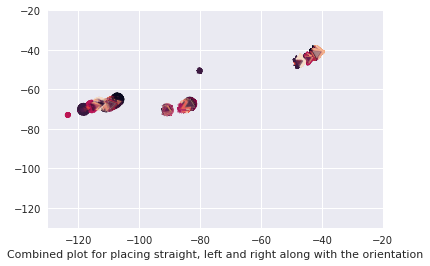

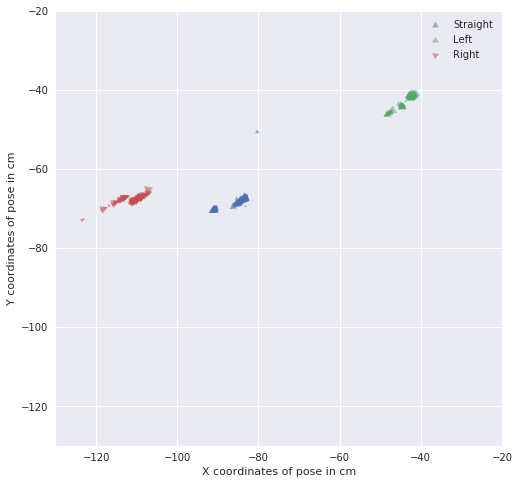

In [11]:
N = 164
area = (10 * np.random.rand(N))**2
z = np.random.rand(N)
def combined_scattered_plt(str_list, left_list, right_list):
    plt.axis([-130, -20, -130, -20])
        
    for i in range(164):   
        angle = np.degrees(str_list[2][i])
        t = mpl.markers.MarkerStyle(marker="^")
        t._transform = t.get_transform().rotate_deg(angle)
        plt.scatter(str_list[0], str_list[1], alpha=0.5, c=z, s=area, marker=t)
        
        angle = np.degrees(left_list[2][i])
        t = mpl.markers.MarkerStyle(marker="^")
        t._transform = t.get_transform().rotate_deg(angle)
        plt.scatter(left_list[0], left_list[1], alpha=0.5, c=z, s=area, marker=t)
        
        angle = np.degrees(right_list[0][i])
        t = mpl.markers.MarkerStyle(marker="^")
        t._transform = t.get_transform().rotate_deg(angle)
        plt.scatter(right_list[0], right_list[1], alpha=0.5, c=z, s=area, marker=t)
    plt.xlabel('Combined plot for placing straight, left and right along with the orientation')
    plt.show()
    
    plt.figure(figsize=(8,8))
    plt.axis([-130, -20, -130, -20])
  
    plt.scatter(str_[0], str_[1], alpha=0.5,label=('Straight'), s=area, marker=(3, 0, np.mean(str_list[2])))
    plt.scatter(left[0], left[1], alpha=0.5, label=('Left'), s=area, marker=(3, 0, np.mean(left_list[2])))
    plt.scatter(right[0], right[1], alpha=0.5, label=('Right'), s=area, marker=(3, 0, np.mean(right_list[2])))
    plt.xlabel('X coordinates of pose in cm')
    plt.ylabel('Y coordinates of pose in cm')
    plt.legend()
    plt.show()
    
str_ = [large_str_x, large_str_y, large_str_o]
left = [large_left_x, large_left_y, large_left_o]
right = [large_right_x, large_right_y, large_right_y]
print "Experiment: Large marker"'\n'"Combined plot for placing the marker straight, left and right"
combined_scattered_plt(str_, left, right)

Gausian plot with removal of outliers
Experiment: Grasping Large marker
Placing:Straight

Removed outliers: 9


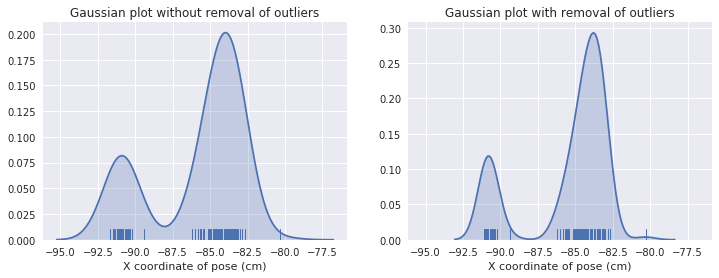


Removed outliers: 36


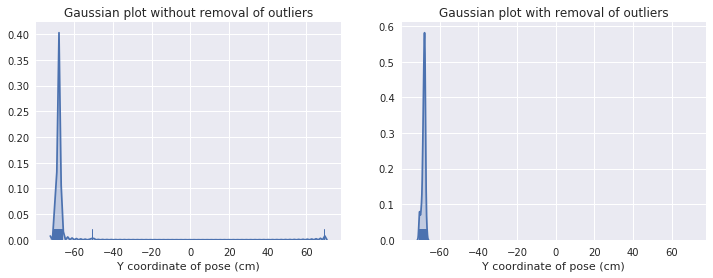


Removed outliers: 35


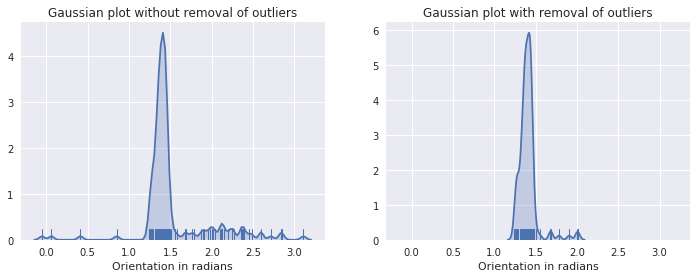

In [82]:
print "Gausian plot with removal of outliers"'\n'"Experiment: Grasping Large marker"'\n'"Placing:Straight"
gaussian_plot_remove_outliers(large_str_x,"x", 0.3, 0.3)
gaussian_plot_remove_outliers(large_str_y, "y", 0.5, 0.5)
gaussian_plot_remove_outliers(large_str_o, "z", 0.5, 0.5)

Gausian plot with removal of outliers
Experiment: Grasping Large marker
Placing:Left

Removed outliers: 22


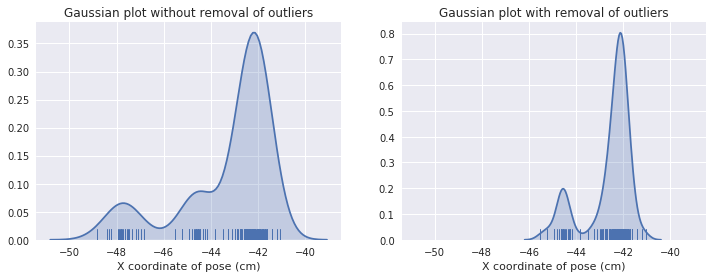


Removed outliers: 35


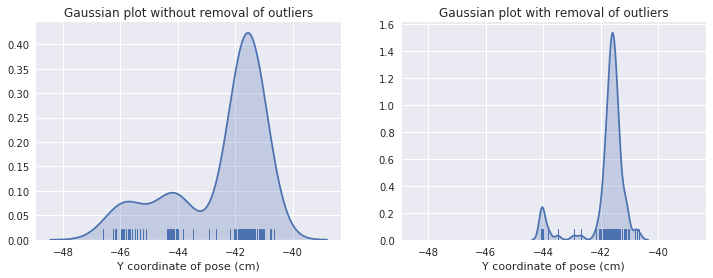


Removed outliers: 24


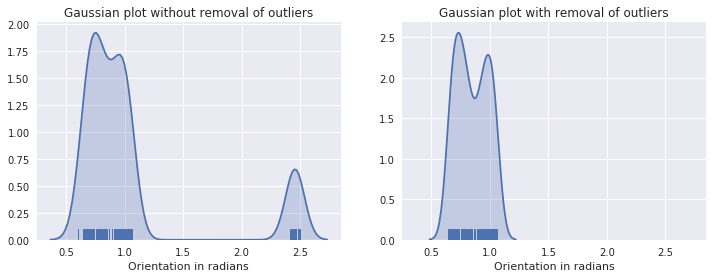

In [83]:
print "Gausian plot with removal of outliers"'\n'"Experiment: Grasping Large marker"'\n'"Placing:Left"
gaussian_plot_remove_outliers(large_left_x,"x", 0.2, 0.2)
gaussian_plot_remove_outliers(large_left_y, "y", 0.3, 0.3)
gaussian_plot_remove_outliers(large_left_o, "z", 0.3, 0.3)

Gausian plot with removal of outliers
Experiment: Grasping Large marker
Placing:Right

Removed outliers: 8


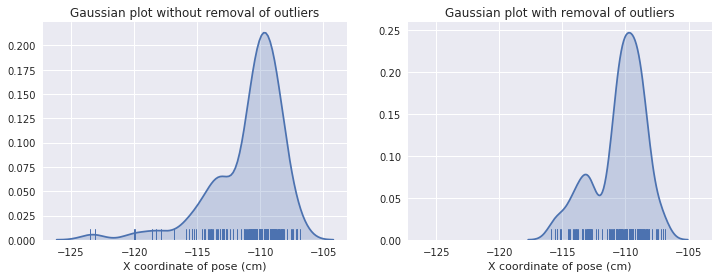


Removed outliers: 9


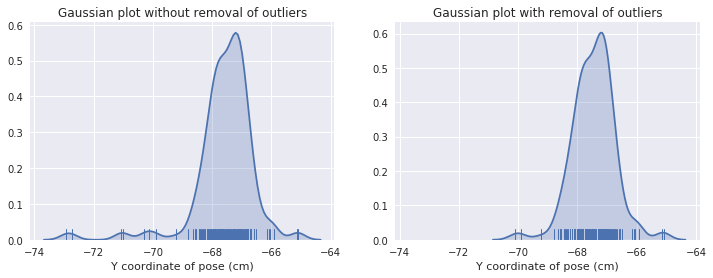


Removed outliers: 0


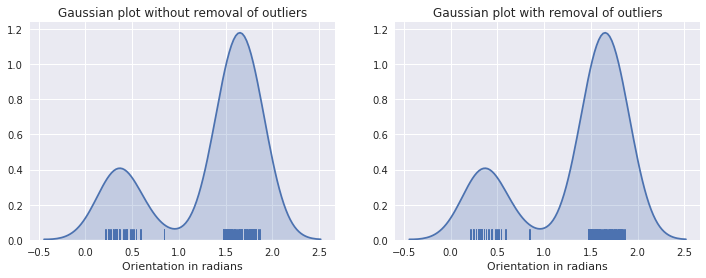

In [84]:
print "Gausian plot with removal of outliers"'\n'"Experiment: Grasping Large marker"'\n'"Placing:Right"
gaussian_plot_remove_outliers(large_right_x,"x", 0.15, 0.15)
gaussian_plot_remove_outliers(large_right_y, "y", 0.15, 0.15)
gaussian_plot_remove_outliers(large_right_o, "z", 0.1, 0.1)